**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

from sklearn.neighbors import KDTree
from sklearn.metrics import pairwise_distances_chunked as pdc


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.y = np.array(y)
        if self.algorithm == 'kd_tree':
            self.X = KDTree(X)
        if self.algorithm == 'brute':
            self.X = np.array(X)
        return self

    def reduce_func(self, chunk, start):
        return self.y[np.argpartition
                      (chunk, self.n_neighbors, axis=1)[:, :self.n_neighbors]]

    def predict(self, X):
        if self.algorithm == 'brute':
            dist = list(pdc(X, self.X, reduce_func=self.reduce_func))[0]
        if self.algorithm == 'kd_tree':
            dist = self.y[self.X.query
                          (X, k=self.n_neighbors, return_distance=False)]
        u, indices = np.unique(dist, return_inverse=True)
        return u[np.argmax(np.apply_along_axis
                           (np.bincount, 1, indices.reshape(dist.shape),
                            None, np.max(indices) + 1), axis=1)]

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            dist = list(pdc(X, self.X, reduce_func=self.reduce_func))[0]
        if self.algorithm == 'kd_tree':
            dist = self.y[self.X.query
                          (X, k=self.n_neighbors, return_distance=False)]
        u, indices = np.unique(dist, return_inverse=True)
        counts = np.apply_along_axis(
            np.bincount, 1, indices.reshape(dist.shape),
            None, np.max(indices) + 1)
        proba = counts / self.n_neighbors
        return proba

    def score(self, X, y):
        return (self.predict(X) == y).sum()/y.shape[0]

    def show(self):
        print(self.testX)

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 656 µs, sys: 94 µs, total: 750 µs
Wall time: 587 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 48 µs, sys: 7 µs, total: 55 µs
Wall time: 44.8 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [8]:
%time clf.predict(X_test)

CPU times: user 2.16 ms, sys: 3.08 ms, total: 5.24 ms
Wall time: 22.3 ms


array([0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 2.5 ms, sys: 0 ns, total: 2.5 ms
Wall time: 1.8 ms


array([0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 1.53 ms, total: 1.53 ms
Wall time: 1.31 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.95 ms, sys: 287 µs, total: 2.24 ms
Wall time: 1.83 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
clf.score(X_test, y_test)

0.9333333333333333

In [13]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

n_neighbors = [ 8  9 10 11 12 13 14]


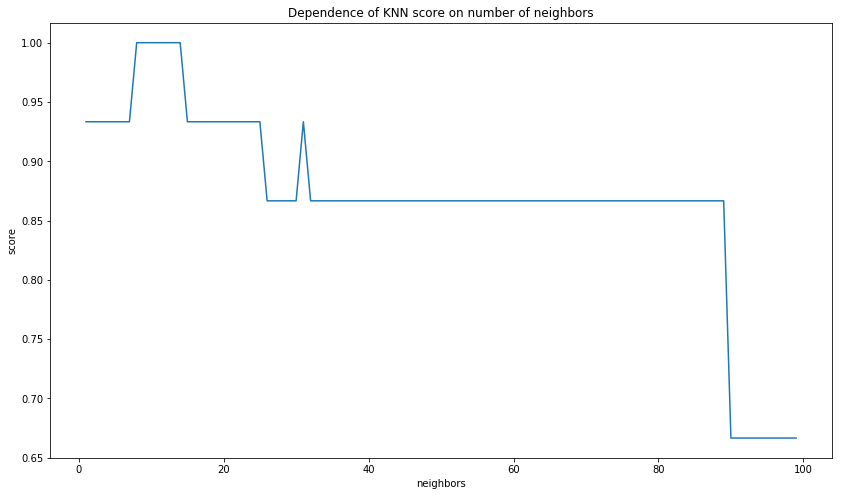

In [14]:
result = np.empty(99)
n_neighbors = np.ndarray(99, dtype = int)
for i in range(1, 100):
    my_clf = MyKNeighborsClassifier(n_neighbors=i, algorithm = 'brute')
    my_clf.fit(X_train, y_train)
    n_neighbors[i - 1] = i
    result[i - 1] = my_clf.score(X_test, y_test)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
sns.lineplot(n_neighbors, result)
ax.set_xlabel('neighbors')
ax.set_ylabel('score')
ax.set_title('Dependence of KNN score on number of neighbors')
print("n_neighbors =", n_neighbors[result == result.max()])


**MNIST**

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)
X_train.shape

(69300, 784)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 182 ms, sys: 426 µs, total: 182 ms
Wall time: 183 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 76.8 ms, sys: 284 ms, total: 361 ms
Wall time: 187 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [20]:
%time clf.predict(X_test)

CPU times: user 4.01 s, sys: 328 ms, total: 4.34 s
Wall time: 2.46 s


array(['9', '6', '3', '0', '9', '2', '7', '5', '7', '4', '6', '5', '4',
       '7', '5', '7', '5', '5', '9', '2', '5', '8', '0', '1', '5', '4',
       '3', '3', '3', '7', '4', '1', '5', '0', '8', '6', '1', '6', '9',
       '8', '6', '0', '2', '2', '3', '6', '7', '4', '3', '8', '2', '3',
       '1', '0', '1', '5', '0', '8', '0', '7', '1', '6', '4', '8', '9',
       '8', '3', '1', '0', '5', '3', '7', '4', '6', '4', '7', '3', '2',
       '8', '9', '5', '2', '8', '9', '4', '1', '8', '7', '4', '1', '2',
       '3', '0', '6', '8', '5', '2', '1', '6', '3', '5', '8', '4', '1',
       '1', '7', '0', '4', '7', '4', '6', '4', '0', '1', '9', '0', '4',
       '7', '5', '5', '4', '9', '1', '8', '7', '2', '8', '3', '0', '8',
       '7', '8', '7', '3', '6', '4', '5', '0', '4', '5', '9', '7', '8',
       '9', '4', '9', '0', '2', '5', '5', '0', '6', '2', '8', '2', '5',
       '7', '9', '1', '8', '5', '5', '7', '2', '8', '6', '3', '5', '1',
       '9', '1', '1', '5', '3', '7', '6', '9', '8', '4', '3', '9

In [21]:
%time my_clf.predict(X_test)

CPU times: user 3.74 s, sys: 289 ms, total: 4.03 s
Wall time: 2.29 s


array(['9', '6', '3', '0', '9', '2', '7', '5', '7', '4', '6', '5', '4',
       '7', '5', '7', '5', '5', '9', '2', '5', '8', '0', '1', '5', '4',
       '3', '3', '3', '7', '4', '1', '5', '0', '8', '6', '1', '6', '9',
       '8', '6', '0', '2', '2', '3', '6', '7', '4', '3', '8', '2', '3',
       '1', '0', '1', '5', '0', '8', '0', '7', '1', '6', '4', '8', '9',
       '8', '3', '1', '0', '5', '3', '7', '4', '6', '4', '7', '3', '2',
       '8', '9', '5', '2', '8', '9', '4', '1', '8', '7', '4', '1', '2',
       '3', '0', '6', '8', '5', '2', '1', '6', '3', '5', '8', '4', '1',
       '1', '7', '0', '4', '7', '4', '6', '4', '0', '1', '9', '0', '4',
       '7', '5', '5', '4', '9', '1', '8', '7', '2', '8', '3', '0', '8',
       '7', '8', '7', '3', '6', '4', '5', '0', '4', '5', '9', '7', '8',
       '9', '4', '9', '0', '2', '5', '5', '0', '6', '2', '8', '2', '5',
       '7', '9', '1', '8', '5', '5', '7', '2', '8', '6', '3', '5', '1',
       '9', '1', '1', '5', '3', '7', '6', '9', '8', '4', '3', '9

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 3.27 s, sys: 319 ms, total: 3.59 s
Wall time: 2.12 s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 3.9 s, sys: 346 ms, total: 4.25 s
Wall time: 2.45 s


array([[0. , 0. , 0. , ..., 0. , 0. , 1. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [24]:
%time clf.score(X_test, y_test)

CPU times: user 3.64 s, sys: 296 ms, total: 3.93 s
Wall time: 2.36 s


0.9728571428571429

In [25]:
%time my_clf.score(X_test, y_test)

CPU times: user 3.64 s, sys: 338 ms, total: 3.98 s
Wall time: 2.31 s


0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 52 s, sys: 184 ms, total: 52.2 s
Wall time: 52.3 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 50.3 s, sys: 257 ms, total: 50.6 s
Wall time: 50.4 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [30]:
%time clf.predict(X_test)

CPU times: user 1min 28s, sys: 45.2 ms, total: 1min 28s
Wall time: 1min 28s


array(['6', '1', '2', '3', '1', '3', '8', '3', '3', '1', '4', '7', '1',
       '5', '5', '1', '7', '9', '5', '2', '9', '7', '9', '4', '4', '3',
       '8', '3', '7', '6', '4', '8', '9', '8', '8', '2', '2', '2', '7',
       '7', '1', '1', '5', '7', '0', '1', '0', '9', '6', '1', '1', '9',
       '9', '5', '9', '7', '8', '0', '5', '1', '6', '3', '5', '8', '0',
       '2', '9', '2', '7', '0', '1', '9', '6', '0', '7', '0', '1', '5',
       '8', '6', '8', '4', '4', '6', '5', '6', '1', '6', '7', '2', '1',
       '0', '7', '2', '1', '5', '1', '0', '5', '3', '5', '2', '6', '8',
       '6', '1', '7', '2', '3', '1', '8', '4', '9', '4', '8', '4', '9',
       '5', '1', '7', '2', '4', '0', '6', '7', '3', '4', '4', '2', '5',
       '4', '1', '3', '4', '7', '1', '0', '3', '3', '4', '3', '6', '5',
       '5', '0', '2', '1', '3', '2', '2', '7', '3', '9', '1', '8', '0',
       '1', '2', '3', '0', '7', '1', '1', '9', '7', '9', '9', '1', '8',
       '4', '8', '2', '2', '2', '3', '2', '4', '0', '7', '9', '3

In [31]:
%time my_clf.predict(X_test)

CPU times: user 1min 13s, sys: 2.58 ms, total: 1min 13s
Wall time: 1min 14s


array(['6', '1', '2', '3', '1', '3', '8', '3', '3', '1', '4', '7', '1',
       '5', '5', '1', '7', '9', '5', '2', '9', '7', '9', '4', '4', '3',
       '8', '3', '7', '6', '4', '8', '9', '8', '8', '2', '2', '2', '7',
       '7', '1', '1', '5', '7', '0', '1', '0', '9', '6', '1', '1', '9',
       '9', '5', '9', '7', '8', '0', '5', '1', '6', '3', '5', '8', '0',
       '2', '9', '2', '7', '0', '1', '9', '6', '0', '7', '0', '1', '5',
       '8', '6', '8', '4', '4', '6', '5', '6', '1', '6', '7', '2', '1',
       '0', '7', '2', '1', '5', '1', '0', '5', '3', '5', '2', '6', '8',
       '6', '1', '7', '2', '3', '1', '8', '4', '9', '4', '8', '4', '9',
       '5', '1', '7', '2', '4', '0', '6', '7', '3', '4', '4', '2', '5',
       '4', '1', '3', '4', '7', '1', '0', '3', '3', '4', '3', '6', '5',
       '5', '0', '2', '1', '3', '2', '2', '7', '3', '9', '1', '8', '0',
       '1', '2', '3', '0', '7', '1', '1', '9', '7', '9', '9', '1', '8',
       '4', '8', '2', '2', '2', '3', '2', '4', '0', '7', '9', '3

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 32s, sys: 72.2 ms, total: 1min 32s
Wall time: 1min 32s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 18s, sys: 26.4 ms, total: 1min 18s
Wall time: 1min 19s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9842857142857143

In [35]:
my_clf.score(X_test, y_test)

0.9842857142857143

Задание 5

In [36]:
# seaborn
Библиотека для визуализации данных

# matplotlib
Библиотека для визуализации данных

# train_test_split
Разбивает массив на train и test подмассивы

# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
функция, предназначенная для создания цепи последовательных преобразований

# StandardScaler (from sklearn.preprocessing import StandardScaler)
производит преобразование z = (x - u) / s, где u - среднее x, s - дисперсия x

# ClassifierMixin
Mixin-класс для всех классификаторов в sklearn, содержит функцию score

# NeighborsBase
базовый класс для всех алгоритмов KNN в sklearn

# KNeighborsMixin
Mixin-класс для реализации различных алгоритмов поиска К ближайших соседей

# SupervisedIntegerMixin
Mixin-класс, использующийся для замешивания,содержит метод fit

SyntaxError: invalid syntax (<ipython-input-36-40ade0c843e8>, line 2)